In [1]:
import pandas as pd

# Load the preprocessed data
df = pd.read_csv('preprocessed_airbnb_data.csv')

# Verify the first few rows
df.head()

,host_is_superhost,instant_bookable,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,...,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,1,1,1.0,37.76931,-122.43386,3.0,1.0,1.0,2.0,1.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,2.0,37.74511,-122.42102,5.0,1.0,2.0,3.0,30.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,10.0,37.76669,-122.45250,2.0,4.0,1.0,1.0,32.0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,10.0,37.76487,-122.45183,2.0,4.0,1.0,1.0,32.0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,2.0,37.77525,-122.43637,5.0,1.5,2.0,2.0,7.0,...,0,0,0,0,0,0,0,0,0,1


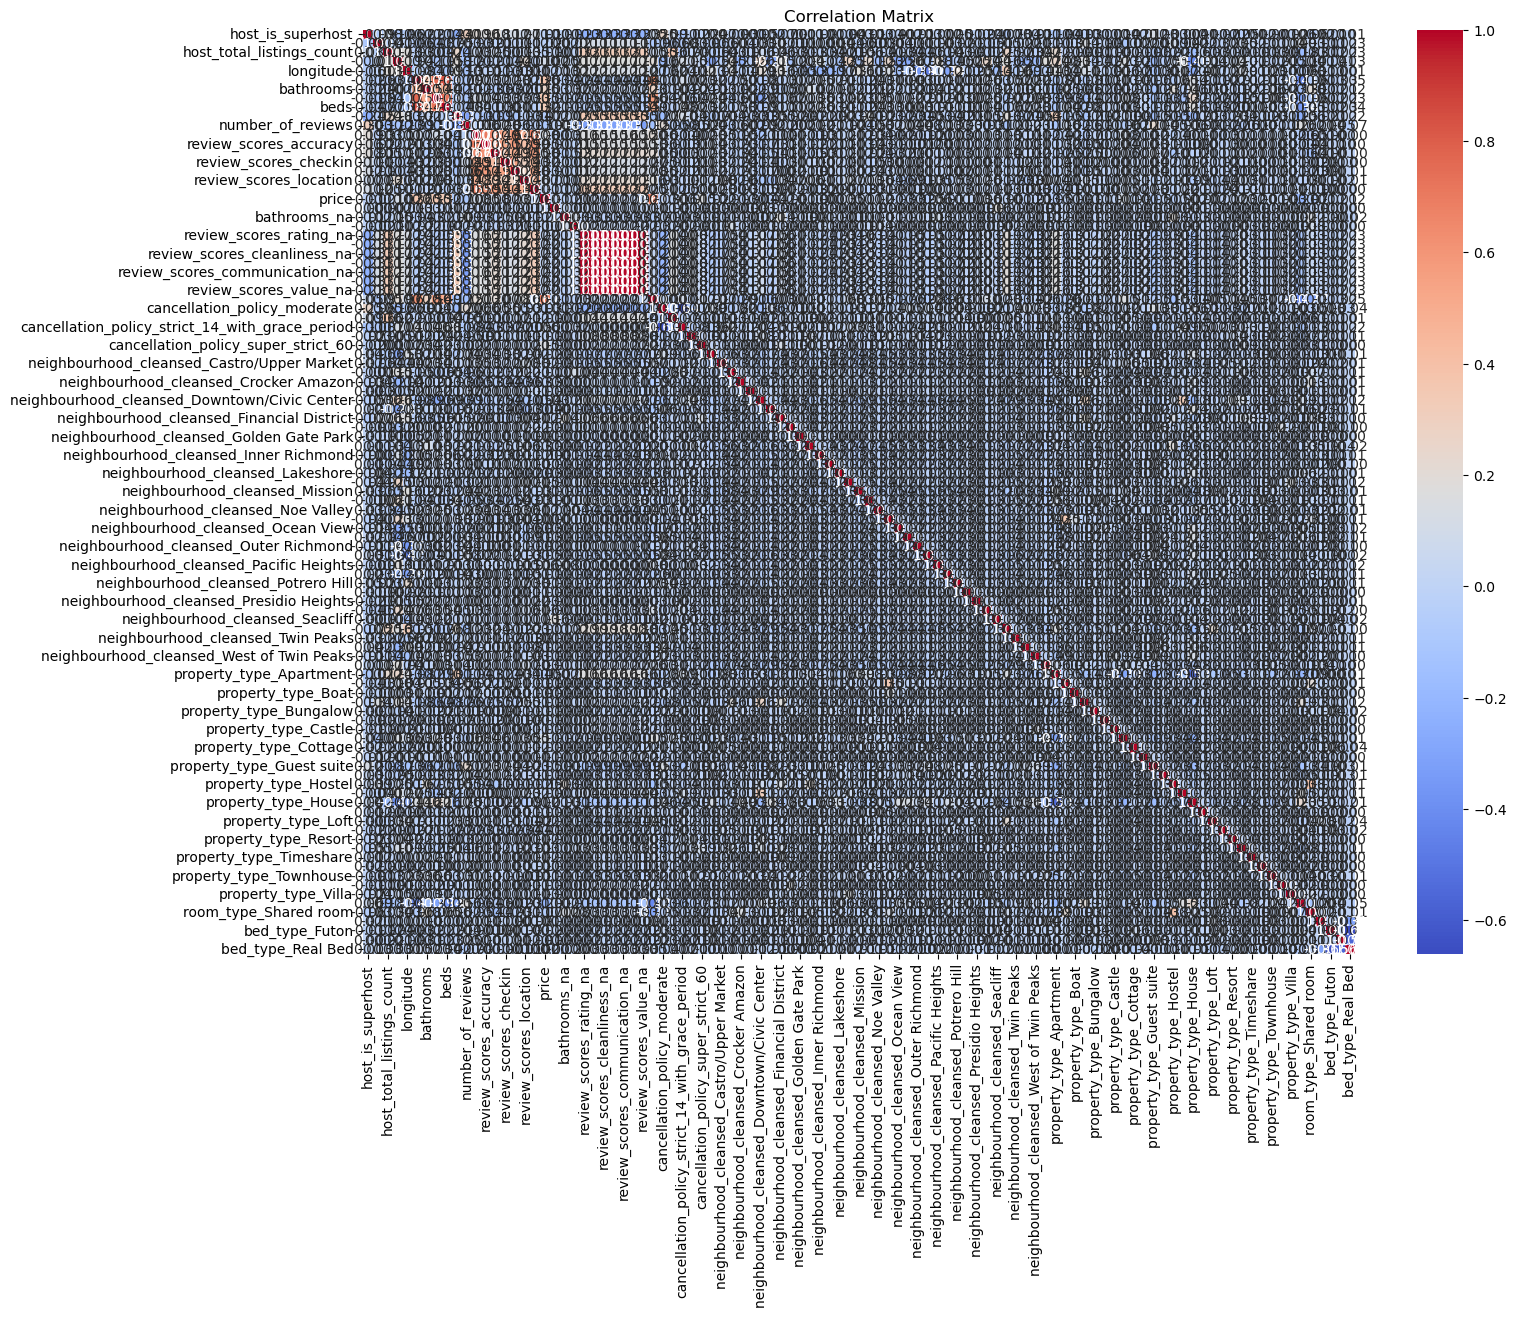

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [3]:
# Sorting the correlation matrix values related to `log_price`
correlation_with_target = corr_matrix['log_price'].sort_values(ascending=False)

# Filtering correlations with an absolute value greater than 0.2 for better visibility
strong_correlations = correlation_with_target[abs(correlation_with_target) > 0.2]

# Display the features with strong correlations with `log_price`
strong_correlations

log_price                 1.000000
price                     0.667005
accommodates              0.609226
bedrooms                  0.557091
beds                      0.486919
bathrooms                 0.275658
review_scores_rating      0.201173
room_type_Shared room    -0.272255
room_type_Private room   -0.423942
Name: log_price, dtype: float64

In [ ]:
# Checking for multicollinearity: Identify pairs of features with high correlation with each other
# looking for correlations above 0.8 (or below -0.8) between features
high_multicollinearity = corr_matrix[(corr_matrix > 0.8) | (corr_matrix < -0.8)].stack().reset_index()
high_multicollinearity = high_multicollinearity[high_multicollinearity['level_0'] != high_multicollinearity['level_1']]

# Display features with high multicollinearity
high_multicollinearity

,level_0,level_1,0
6,accommodates,beds,0.839718
9,beds,accommodates,0.839718
25,review_scores_rating_na,review_scores_accuracy_na,0.998247
26,review_scores_rating_na,review_scores_cleanliness_na,0.998684
27,review_scores_rating_na,review_scores_checkin_na,0.997372
28,review_scores_rating_na,review_scores_communication_na,0.999122
29,review_scores_rating_na,review_scores_location_na,0.997372
30,review_scores_rating_na,review_scores_value_na,0.996936
31,review_scores_accuracy_na,review_scores_rating_na,0.998247
33,review_scores_accuracy_na,review_scores_cleanliness_na,0.999562


Feature ranking:
1. feature bedrooms (0.5320)
2. feature accommodates (0.1319)
3. feature review_scores_rating (0.1145)
4. feature room_type_Private room (0.0813)
5. feature bathrooms (0.0721)
6. feature room_type_Shared room (0.0682)


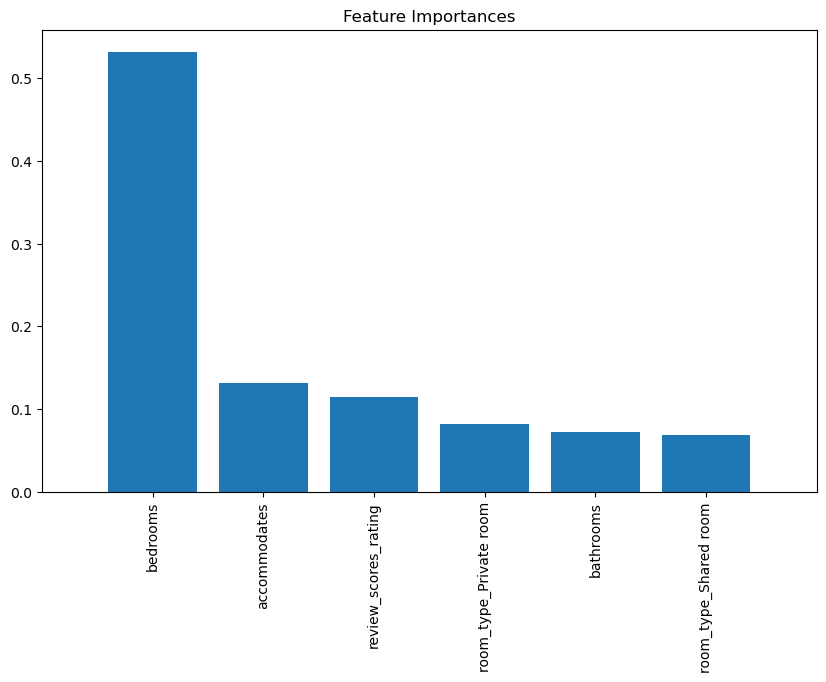

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

selected_features = ['accommodates', 'bedrooms', 'bathrooms',
                     'room_type_Private room', 'room_type_Shared room',
                     'review_scores_rating']

# Create the feature matrix X and the target vector y
X = df[selected_features]
y = df['log_price']

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Extract feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. feature {X.columns[indices[i]]} ({importances[indices[i]]:.4f})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [6]:
import pandas as pd

# Finalizing the feature set based on correlation analysis and model-based feature importance
# Selected features:
# 1. 'bedrooms': Most influential feature according to Random Forest feature importance (0.5320).
#    This feature has a strong positive correlation with log_price and is crucial for predicting the price.
# 2. 'accommodates': Second most important feature (0.1319). This captures the capacity of the listing,
#    which is a key determinant of price.
# 3. 'review_scores_rating': Moderately important feature (0.1145). This represents the overall quality
#    of the listing as rated by users, which can influence the price.
# 4. 'room_type_Private room': Important feature (0.0813) indicating whether the listing offers a private room.
#    This typically leads to a lower price compared to entire homes.
# 5. 'bathrooms': Less influential feature (0.0721) but still relevant. More bathrooms often correlate
#    with higher prices, though this effect is not as strong as for bedrooms or accommodates.
# 6. 'room_type_Shared room': Least influential feature (0.0682), but still contributes by capturing
#    listings with shared rooms, which usually have lower prices.

# Defining the final feature set
final_features = ['bedrooms', 'accommodates', 'review_scores_rating', 
                  'room_type_Private room', 'bathrooms', 'room_type_Shared room']

# Create the feature matrix X and the target vector y
X = df[final_features]
y = df['log_price']

# X now contains the final selected features for the model
X.head()


,bedrooms,accommodates,review_scores_rating,room_type_Private room,bathrooms,room_type_Shared room
0,1.0,3.0,97.0,0,1.0,0
1,2.0,5.0,98.0,0,1.0,0
2,1.0,2.0,85.0,1,4.0,0
3,1.0,2.0,93.0,1,4.0,0
4,2.0,5.0,97.0,0,1.5,0


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# X is the feature matrix, y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5716, 6)
X_test shape: (1430, 6)
y_train shape: (5716,)
y_test shape: (1430,)


In [8]:
# Save the training and testing sets to CSV files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)